In [187]:
!pip install pandas
!pip install numpy
!pip install seaborn


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
trainData = pd.read_csv('train.csv')

In [190]:
pd.set_option("display.max_columns", None)
display(trainData.sample(10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
383,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.0000,NaN,S
322,323,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.3500,NaN,Q
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C
515,516,0,1,"Walker, Mr. William Anderson",male,47.0,0,0,36967,34.0208,D46,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [191]:
display(trainData.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [192]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       ):
    display(trainData.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [193]:
trainData["Embarked"].fillna('S', inplace = True)
trainData["Age"].fillna(29.7, inplace = True)


In [194]:
useless_features = ['PassengerId', 'Survived', 'Name', 'Ticket','Cabin']

trainData.drop(useless_features, inplace=True, axis=1)

In [195]:
display(trainData.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [196]:
categorical_features = ['Pclass','Sex','Embarked'] 
    

In [197]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_features = trainData.select_dtypes(include = numerics).columns.delete(0).values.tolist()
numerical_features = list(set(numerical_features).difference(categorical_features))
numerical_features

['SibSp', 'Parch', 'Age', 'Fare']

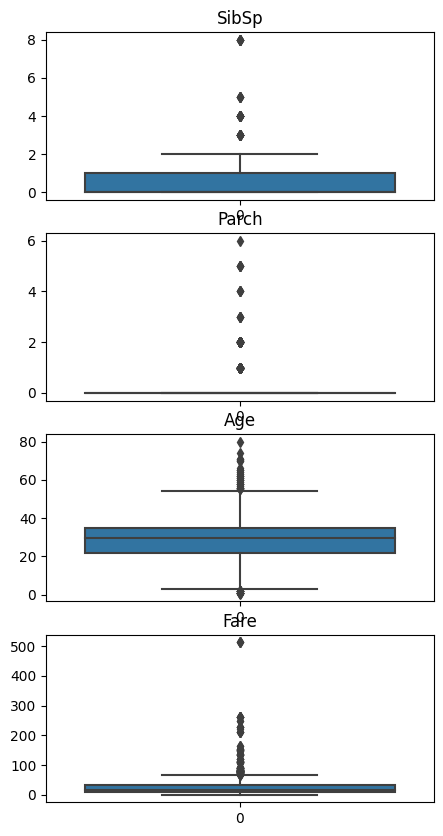

In [198]:
fig, axes = plt.subplots(nrows=len(numerical_features),ncols=1, figsize = (5, 10))
for i, col in enumerate(numerical_features):
    sns.boxplot(trainData[col].values, ax=axes[i]).set_title(col)
plt.show()


In [199]:
newCategorias = pd.get_dummies(trainData[categorical_features])
trainData = trainData.drop(columns = categorical_features)
trainData = trainData.join(newCategorias)

In [200]:
trainData

,Age,SibSp,Parch,Fare,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,3,0,1,0,0,1
1,38.0,1,0,71.2833,1,1,0,1,0,0
2,26.0,0,0,7.9250,3,1,0,0,0,1
3,35.0,1,0,53.1000,1,1,0,0,0,1
4,35.0,0,0,8.0500,3,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,2,0,1,0,0,1
887,19.0,0,0,30.0000,1,1,0,0,0,1
888,29.7,1,2,23.4500,3,1,0,0,0,1
889,26.0,0,0,30.0000,1,0,1,1,0,0


In [201]:
!pip install -U scikit-learn


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [202]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
np.random.seed(0)

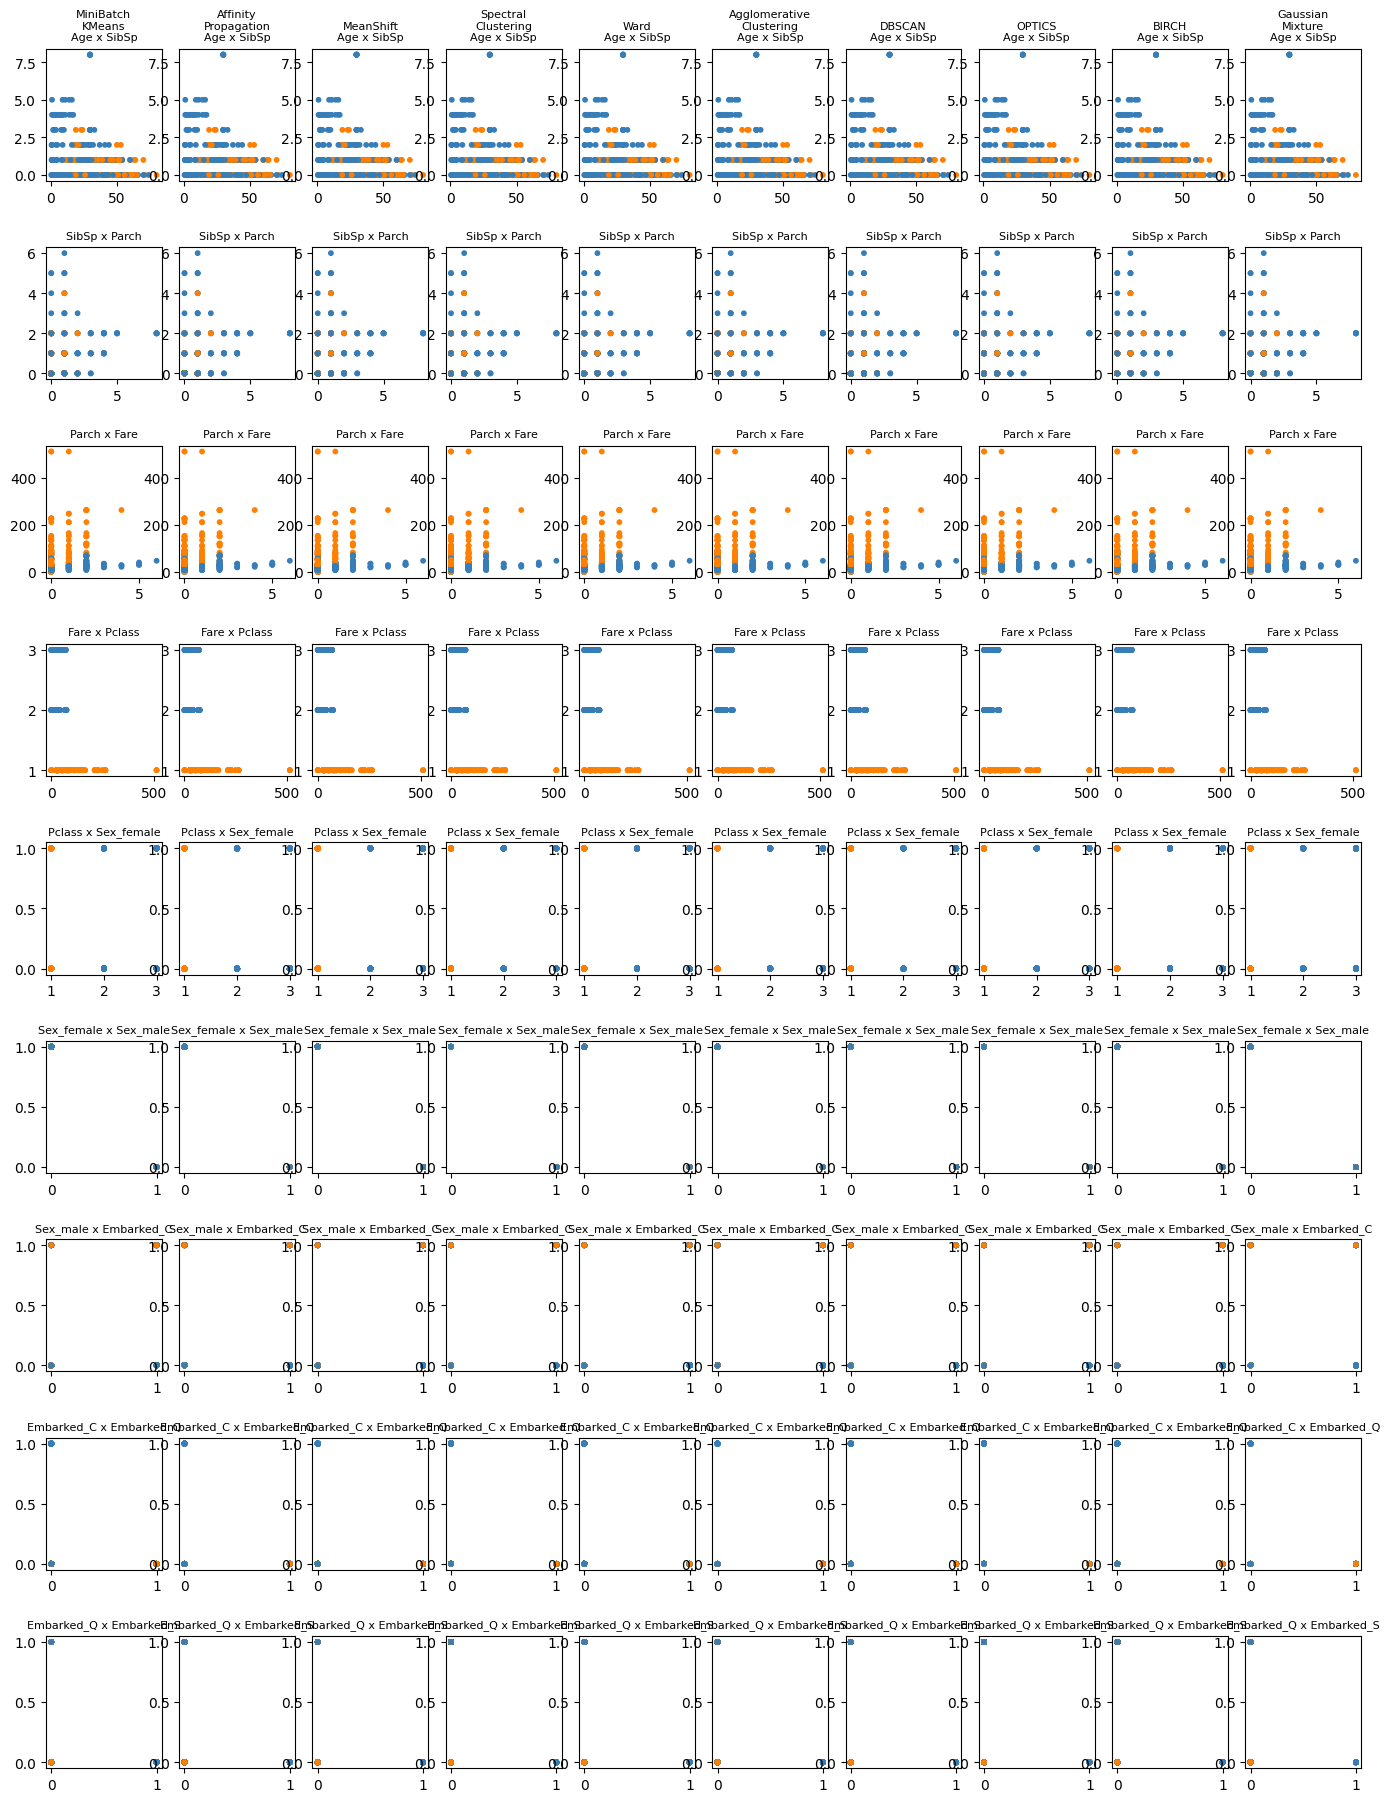

In [203]:
plt.figure(figsize=(9 * 1.3 + 2, 20))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.15, hspace=0.5
)
plot_num = 1
params={
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 2,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1
}
dataset=(trainData.to_numpy(),None)

result = {}

X, y = dataset

# normalize dataset for easier parameter selection
# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    X, n_neighbors=params["n_neighbors"], include_self=False
)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"], n_init="auto")
ward = cluster.AgglomerativeClustering(
    n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
)
spectral = cluster.SpectralClustering(
    n_clusters=params["n_clusters"],
    eigen_solver="arpack",
    affinity="nearest_neighbors",
)
dbscan = cluster.DBSCAN(eps=params["eps"])
optics = cluster.OPTICS(
    min_samples=params["min_samples"],
    xi=params["xi"],
    min_cluster_size=params["min_cluster_size"],
)
affinity_propagation = cluster.AffinityPropagation(
    damping=params["damping"], preference=params["preference"], random_state=0
)
average_linkage = cluster.AgglomerativeClustering(
    linkage="average",
    metric="cityblock",
    n_clusters=params["n_clusters"],
    connectivity=connectivity,
)
birch = cluster.Birch(n_clusters=params["n_clusters"])
gmm = mixture.GaussianMixture(
    n_components=params["n_clusters"], covariance_type="full"
)

clustering_algorithms = (
    ("MiniBatch\nKMeans", two_means),
    ("Affinity\nPropagation", affinity_propagation),
    ("MeanShift", ms),
    ("Spectral\nClustering", spectral),
    ("Ward", ward),
    ("Agglomerative\nClustering", average_linkage),
    ("DBSCAN", dbscan),
    ("OPTICS", optics),
    ("BIRCH", birch),
    ("Gaussian\nMixture", gmm),
)


for name, algorithm in clustering_algorithms:
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the "
            + "connectivity matrix is [0-9]{1,2}"
            + " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning,
        )
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding"
            + " may not work as expected.",
            category=UserWarning,
        )
        algorithm.fit(X)

    if hasattr(algorithm, "labels_"):
        y_pred = algorithm.labels_.astype(int)
    else:
        y_pred = algorithm.predict(X)
    result[name]=(X,y_pred)
        

for i in range(len(dataset[0][0])-1):
    for name, algorithm in clustering_algorithms:
        plt.subplot(len(dataset[0][0]), len(clustering_algorithms), plot_num)
        title = ""
        
        if i == 0:
            title+= name+"\n"
        title += trainData.columns[i]+" x "+trainData.columns[i+1]
        plt.title(title, size=8);
        
        colors = np.array(list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        plt.scatter(result[name][0][:, i], result[name][0][:, i+1], s=10, color=colors[y_pred]) 
        plot_num += 1

plt.show()

In [204]:
testingResult = pd.read_csv('train.csv')
for name, algorithm in clustering_algorithms:
    testingResult[name] = np.where(testingResult["Survived"]==result[name][1], 1,0)
    print(str((testingResult[name].value_counts()/testingResult[name].count())*100)+"\n")



1    67.340067
0    32.659933
Name: MiniBatch\nKMeans, dtype: float64

0    98.765432
1     1.234568
Name: Affinity\nPropagation, dtype: float64

1    62.289562
0    37.710438
Name: MeanShift, dtype: float64

1    62.514029
0    37.485971
Name: Spectral\nClustering, dtype: float64

1    62.514029
0    37.485971
Name: Ward, dtype: float64

1    61.952862
0    38.047138
Name: Agglomerative\nClustering, dtype: float64

0    97.306397
1     2.693603
Name: DBSCAN, dtype: float64

0    85.970819
1    14.029181
Name: OPTICS, dtype: float64

1    62.514029
0    37.485971
Name: BIRCH, dtype: float64

1    67.901235
0    32.098765
Name: Gaussian\nMixture, dtype: float64



Краще за все себе показав Affinity\nPropagation, а саме 98.77%